In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pytesseract
import pyodbc
import re

In [2]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select b.description from DatixCRM.dbo.code_locactual b join DatixCRM.dbo.incidents_main a on a.inc_locactual = b.code where a.inc_type='PAT' and a.inc_category='MEDIC' and a.inc_organisation='QA' and b.cod_parent2='QA'"
df = pd.read_sql(query, sql_conn)
df.columns = ['location']
df.head()

,location
0,E6/7
1,C5
2,Emergency Department (ED)
3,C7
4,D5


In [3]:
def find_ward(location):
    ward = re.findall(r"[A-G][0-9]",location)
    if len(ward)>0: return ward[0]
    else: return location

In [4]:
def find_ward1to4(location):
    ward1to4 = re.findall(r"[D-G][1-4]",location)
    if len(ward1to4)>0: return ward1to4[0][0]+'3'
    else: return location

In [5]:
def find_wardBCF5to7(location):
    ward5to7 = re.findall(r"(B|C|F)[5-7]",location)
    if len(ward5to7)>0: return ward5to7[0][0]+'6'
    else: return location

In [6]:
def find_wardEG6to8(location):
    ward6to8 = re.findall(r"(E|G)[6-8]",location)
    if len(ward6to8)>0: return ward6to8[0][0]+'7'
    else: return location

In [7]:
def find_acronym(location):
    acronym = re.findall(r"\(([A-Z]+)\)",location)
    if len(acronym)>0: return acronym[0]
    else: return location

In [8]:
def find_haematology_or_oncology(location):
    if 'Haematology' in location or 'Oncology' in location: return 'Haematology & Oncology Centre'
    else: return location

In [9]:
def find_ED(location):
    if 'Emergency Department' in location: return 'Emergency Department'
    else: return location

In [10]:
def find_Ophthalmology(location):
    if 'Ophthalmology' in location: return 'Eye'
    else: return location

In [11]:
def find_surgical(location):
    if 'Surgical' in location: return 'E3'
    else: return location

In [12]:
df['location'] = np.vectorize(find_ward)(df['location'])
df['location'] = np.vectorize(find_ward1to4)(df['location'])
df['location'] = np.vectorize(find_wardBCF5to7)(df['location'])
df['location'] = np.vectorize(find_wardEG6to8)(df['location'])
#df['location'] = np.vectorize(find_acronym)(df['location'])
df['location'] = np.vectorize(find_haematology_or_oncology)(df['location'])
df['location'] = np.vectorize(find_ED)(df['location'])
df['location'] = np.vectorize(find_Ophthalmology)(df['location'])
df['location'] = np.vectorize(find_surgical)(df['location'])

In [13]:
df.loc[df['location'] == 'A7', 'location'] = 'Paediatric Unit'
df.loc[df['location'] == 'A8', 'location'] = 'Paediatric Unit'
df.loc[df['location'] == 'Administration Offices Renal & Transplant', 'location'] = 'Renal Unit'
df.loc[df['location'] == 'Renal Day Unit  QA', 'location'] = 'Renal Unit'
df.loc[df['location'] == 'Anti Coagulation Clinic QA', 'location'] = 'Haematology & Oncology Centre'
df.loc[df['location'] == 'Cardiac Catheter Laboratory', 'location'] = 'Cardiology'
df.loc[df['location'] == 'Cardiac Day Unit (CDU)', 'location'] = 'Cardiology'
df.loc[df['location'] == 'Cardiology Outpatients QA', 'location'] = 'C Level Outpatients'
df.loc[df['location'] == 'Childrens Assesment Unit (CAU)', 'location'] = 'Paediatric Unit'
df.loc[df['location'] == 'Colorectal Outpatients QA', 'location'] = 'C Level Outpatients'
df.loc[df['location'] == 'Diabetes and Endocrinology Centre QA', 'location'] = 'Diabetes and Endocrinology'
df.loc[df['location'] == 'ENT Outpatients QA', 'location'] = 'Ear, Nose & Throat'
df.loc[df['location'] == 'Early Pregnancy Assessment Unit', 'location'] = 'A5'
df.loc[df['location'] == 'Endoscopy Unit D Level QA', 'location'] = 'Endoscopy Unit'
df.loc[df['location'] == 'Eye Day Case Unit QA', 'location'] = 'Eye Unit'
df.loc[df['location'] == 'Gastroenterology  Outpatients QA', 'location'] = 'D Level Outpatients'
df.loc[df['location'] == 'Gynae Outpatients QA', 'location'] = 'Gynaecology Outpatients'
df.loc[df['location'] == 'Haemodialysis Unit', 'location'] = 'Renal Haemodialysis'
df.loc[df['location'] == 'Maxillofacial Outpatients QA', 'location'] = 'D Level Outpatients'
df.loc[df['location'] == 'Ophthalmology Eye Emergency Department', 'location'] = 'Eye Unit'
df.loc[df['location'] == 'Pathology Department', 'location'] = 'Pathology'
df.loc[df['location'] == 'Peritoneal Dialysis', 'location'] = 'Renal Unit'
df.loc[df['location'] == 'Radiotherapy  Dept within CHOC', 'location'] = 'F6'
df.loc[df['location'] == 'Receipt and Delivery', 'location'] = 'Reception'
df.loc[df['location'] == 'Reception (Atrium)', 'location'] = 'Reception'
df['location'] = df['location'].str.replace(' Unit','')
df.loc[df['location'] == 'Renal', 'location'] = 'Renal Unit'

In [14]:
df = df[df['location'] != "Administration Offices Women and Children's"]
df = df[df['location'] != 'Anaesthetics Department'] 
df = df[df['location'] != 'Antenatal Clinic'] 
df = df[df['location'] != 'Diagnostic Imaging'] 
df = df[df['location'] != 'ICT  Centre QA'] 
df = df[~df['location'].str.contains('Maternity')] 
df = df[df['location'] != 'Observation Ward']
df = df[df['location'] != 'Occupational Health']
df = df[df['location'] != 'Orthopaedic Pre Operation Clinic QA']
df = df[df['location'] != 'Pre-Operative Assessment (POA)']
df = df[~df['location'].str.contains('QA@ Home ')] 
df = df[df['location'] != 'Research & Development Department']
df = df[df['location'] != 'Respiratory Day']
df = df[df['location'] != 'TIA Clinic']
df = df[df['location'] != 'Theatres QA']
df = df[df['location'] != 'Transplant and Retrieval  QA']

In [15]:
location_counts = df['location'].value_counts().sort_index(ascending=True)
print(location_counts)

A5                                  88
Acute Medical (AMU) (MAU)          900
B6                                 202
B8                                 117
B9                                 236
C Level Outpatients                 16
C6                                 657
Cardiology                          67
D Level Outpatients                 11
D3                                 659
D5                                 103
D6                                  88
D7                                 183
D8                                 165
Day Surgery QA                      48
Diabetes and Endocrinology           8
Discharge                           12
E3                                 545
E5                                 184
E7                                 330
Ear, Nose & Throat                  10
Emergency Department               778
Endoscopy                           22
Eye                                 64
F3                                 457
F6                       

In [16]:
df_counts = location_counts.rename_axis('location').reset_index(name='events')
print(df_counts)

                          location  events
0                               A5      88
1        Acute Medical (AMU) (MAU)     900
2                               B6     202
3                               B8     117
4                               B9     236
5              C Level Outpatients      16
6                               C6     657
7                       Cardiology      67
8              D Level Outpatients      11
9                               D3     659
10                              D5     103
11                              D6      88
12                              D7     183
13                              D8     165
14                  Day Surgery QA      48
15      Diabetes and Endocrinology       8
16                       Discharge      12
17                              E3     545
18                              E5     184
19                              E7     330
20              Ear, Nose & Throat      10
21            Emergency Department     778
22         

In [17]:
df_counts['floor'] = df_counts['location'].str[0]
df_counts.loc[df_counts['location'] == 'Acute Medical (AMU) (MAU)', 'floor'] = 'C'
df_counts.loc[df_counts['location'] == 'Diabetes and Endocrinology', 'floor'] = 'C'
df_counts.loc[df_counts['location'] == 'Discharge', 'floor'] = 'A'
df_counts.loc[df_counts['location'] == 'Ear, Nose & Throat', 'floor'] = 'D'
df_counts.loc[df_counts['location'] == 'Emergency Department', 'floor'] = 'C'
df_counts.loc[df_counts['location'] == 'Endoscopy', 'floor'] = 'D'
df_counts.loc[df_counts['location'] == 'Eye', 'floor'] = 'B'
df_counts.loc[df_counts['location'] == 'Gynaecology Outpatients', 'floor'] = 'D'
df_counts.loc[df_counts['location'] == 'Haematology & Oncology Centre', 'floor'] = 'B'
df_counts.loc[df_counts['location'] == 'Medical Physics Department', 'floor'] = 'F'
df_counts.loc[df_counts['location'] == 'Paediatric', 'floor'] = 'A'
df_counts.loc[df_counts['location'] == 'Pathology', 'floor'] = 'E'
df_counts.loc[df_counts['location'] == 'Pharmacy QA', 'floor'] = 'C'
df_counts.loc[df_counts['location'] == 'Reception', 'floor'] = 'A'
df_counts.loc[df_counts['location'] == 'Rheumatology Outpatients QA', 'floor'] = 'C'
df_counts.loc[df_counts['location'] == 'Theatre Admissions Suite (TAS)', 'floor'] = 'E'

In [18]:
def find_renal(location,floor):
    if 'Renal' in location: return 'G'
    else: return floor

In [19]:
df_counts['floor'] = np.vectorize(find_renal)(df_counts['location'],df_counts['floor'])

In [20]:
df_counts['location'] = df_counts['location'].str.replace(' QA','')
print(df_counts.sort_values(by=['floor']))

                          location  events floor
0                               A5      88     A
16                       Discharge      12     A
36                       Reception       2     A
33                      Paediatric     229     A
2                               B6     202     B
3                               B8     117     B
4                               B9     236     B
23                             Eye      64     B
31   Haematology & Oncology Centre     307     B
15      Diabetes and Endocrinology       8     C
35                        Pharmacy    1074     C
7                       Cardiology      67     C
6                               C6     657     C
5              C Level Outpatients      16     C
1        Acute Medical (AMU) (MAU)     900     C
21            Emergency Department     778     C
40        Rheumatology Outpatients     176     C
30         Gynaecology Outpatients       4     D
22                       Endoscopy      22     D
20              Ear,

In [21]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text_dict = {}
floors = ['A','B','C','D','E','F','G']
for floor in floors:
    text = pytesseract.image_to_data(Image.open('level_maps_'+floor.lower()+'.png'),output_type='data.frame')
    text = text.dropna()
    text = text[text.text != ' ']
    text = text[text.text != '  ']
    text = text[text.text != '   ']
    text = text[text.text != '    ']
    text = text[text.text != '     ']
    text_dict[floor] = text
print(text_dict)

{'A':      level  page_num  block_num  par_num  line_num  word_num  left  top  \
4        5         1          1        1         1         1    58   44   
5        5         1          1        1         1         2   138   44   
6        5         1          1        1         1         3   301   44   
7        5         1          1        1         1         4   465   44   
8        5         1          1        1         1         5   538   54   
9        5         1          1        1         1         6   654   44   
10       5         1          1        1         1         7   764   44   
11       5         1          1        1         1         8   848   45   
13       5         1          1        1         2         1    59   94   
14       5         1          1        1         2         2   207   95   
15       5         1          1        1         2         3   288   93   
16       5         1          1        1         2         4   364   96   
17       5         

In [22]:
text_dict['A'].loc[text_dict['A'].text == 'AS,', 'text'] = 'A5'
text_dict['A'].loc[text_dict['A'].text == 'Dischage', 'text'] = 'Discharge'
text_dict['B'].loc[text_dict['B'].text == 'Centre', 'text'] = 'Haematology & Oncology Centre'
text_dict['B'].loc[text_dict['B'].text == '(B8)', 'text'] = 'B8'
text_dict['B'].loc[text_dict['B'].text == 'Neonatal', 'text'] = 'B9'
text_dict['B'].loc[text_dict['B'].text == 'Eye', 'left'] = 1100
text_dict['C'].loc[text_dict['C'].text == 'Day', 'text'] = 'Acute Medical (AMU) (MAU)'
text_dict['C'].loc[text_dict['C'].text == 'Acute Medical (AMU) (MAU)', 'top'] = 354
text_dict['C'].loc[text_dict['C'].text == 'Ambulance', 'left'] = 700
text_dict['C'].loc[text_dict['C'].text == 'Ambulance', 'text'] = 'C Level Outpatients'
text_dict['C'].loc[text_dict['C'].text == 'C Level Outpatients', 'left'] = 50
text_dict['C'].loc[text_dict['C'].text == 'Diabetes', 'text'] = 'Diabetes and Endocrinology'
text_dict['C'].loc[text_dict['C'].text == 'Blood', 'text'] = 'Emergency Department'
text_dict['C'].loc[text_dict['C'].text == 'Emergency Department', 'left'] = 1100
text_dict['C'].loc[text_dict['C'].text == 'Rheumatology', 'text'] = 'Rheumatology Outpatients'
text_dict['D'].loc[text_dict['D'].text == 'Day', 'text'] = 'Day Surgery'
text_dict['D'].loc[text_dict['D'].text == 'Nose', 'text'] = 'Ear, Nose & Throat'
text_dict['D'].loc[text_dict['D'].text == 'Level', 'text'] = 'D Level Outpatients'
text_dict['D'].loc[text_dict['D'].text == 'Gynaecology', 'text'] = 'Gynaecology Outpatients'
text_dict['E'].loc[text_dict['E'].text == 'Theatre', 'text'] = 'Theatre Admissions Suite (TAS)'
text_dict['E'].loc[text_dict['E'].text == 'E5)', 'text'] = 'E5'
text_dict['F'].loc[text_dict['F'].text == 'Medical', 'text'] = 'Medical Physics Department'
text_dict['G'].loc[text_dict['G'].text == 'Unit', 'text'] = 'Renal Unit'
text_dict['G'].loc[text_dict['G'].text == 'G8,', 'text'] = 'G5'
text_dict['G'].loc[text_dict['G'].text == 'G5', 'top'] = 750
text_dict['G'].loc[text_dict['G'].text == 'G5', 'left'] = 700
text_dict['G'].loc[text_dict['G'].text == 'G2,', 'text'] = 'G3'
text_dict['G'].loc[text_dict['G'].text == 'Haemodialysis', 'text'] = 'Renal Haemodialysis'
text_dict['G'].loc[text_dict['G'].text == 'Outpatients', 'text'] = 'Renal Outpatients'

In [23]:
merged_dict = {}
for floor in floors:
    merged_dict[floor] = pd.merge(left=df_counts,right=text_dict[floor],left_on='location',right_on='text')
print(merged_dict)

{'A':      location  events floor  level  page_num  block_num  par_num  line_num  \
0          A5      88     A      5         1         21        1         2   
1   Discharge      12     A      5         1         17        1         1   
2  Paediatric     229     A      5         1         18        1         1   
3   Reception       2     A      5         1         10        2         2   

   word_num  left  top  width  height  conf        text  
0         1   784  823     37      23    60          A5  
1         1   772  706    102      28    92   Discharge  
2         1   316  705    113      27    96  Paediatric  
3         1   102  554    127      41    96   Reception  , 'B':                         location  events floor  level  page_num  block_num  \
0                             B6     202     B      5         1          9   
1                             B8     117     B      5         1          9   
2                             B9     236     B      5         1          

In [24]:
cm = plt.cm.get_cmap('RdYlGn_r')
vmin = df_counts['events'].min()
vmax = df_counts['events'].max()
area_multiplication = 6

0     88
1     12
2    229
3      2
Name: events, dtype: int64
[ 528   72 1374   12]
[ 88  12 229   2]
0    202
1    117
2    236
3     64
4    307
Name: events, dtype: int64
[1212  702 1416  384 1842]
[202 117 236  64 307]
0     900
1      16
2     657
3      67
4       8
5     778
6    1074
7     176
Name: events, dtype: int64
[5400   96 3942  402   48 4668 6444 1056]
[ 900   16  657   67    8  778 1074  176]
0     11
1    659
2    103
3     88
4    183
5    165
6     48
7     10
8     22
9      4
Name: events, dtype: int64
[  66 3954  618  528 1098  990  288   60  132   24]
[ 11 659 103  88 183 165  48  10  22   4]
0    545
1    184
2    330
3      2
4      5
Name: events, dtype: int64
[3270 1104 1980   12   30]
[545 184 330   2   5]
0    457
1    328
2      1
Name: events, dtype: int64
[2742 1968    6]
[457 328   1]
0    348
1      4
2    170
3     75
4     29
5      9
6     36
Name: events, dtype: int64
[2088   24 1020  450  174   54  216]
[348   4 170  75  29   9  36]


<Figure size 432x288 with 0 Axes>

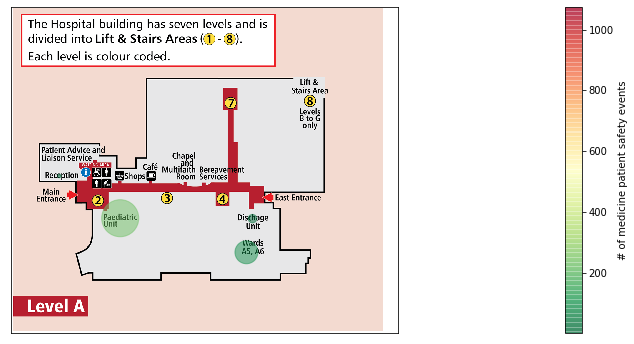

<Figure size 432x288 with 0 Axes>

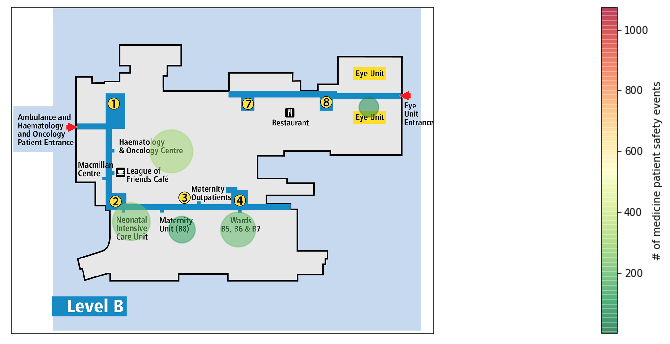

<Figure size 432x288 with 0 Axes>

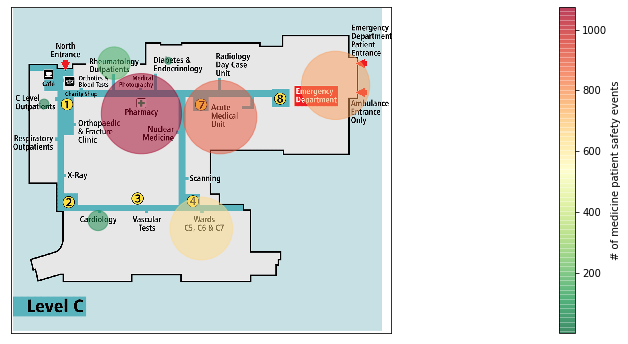

<Figure size 432x288 with 0 Axes>

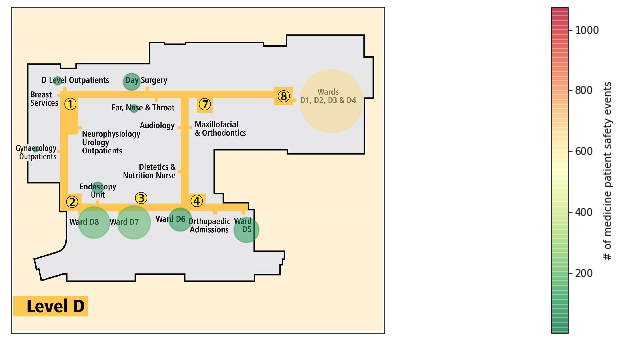

<Figure size 432x288 with 0 Axes>

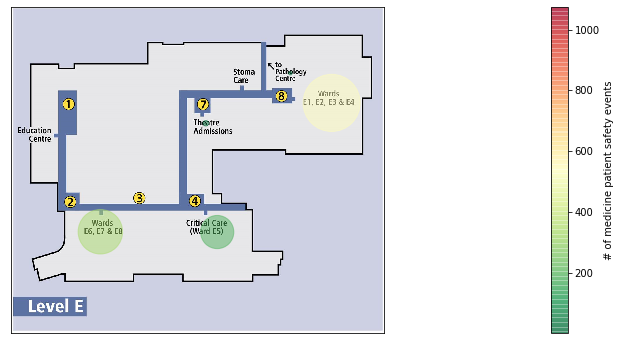

<Figure size 432x288 with 0 Axes>

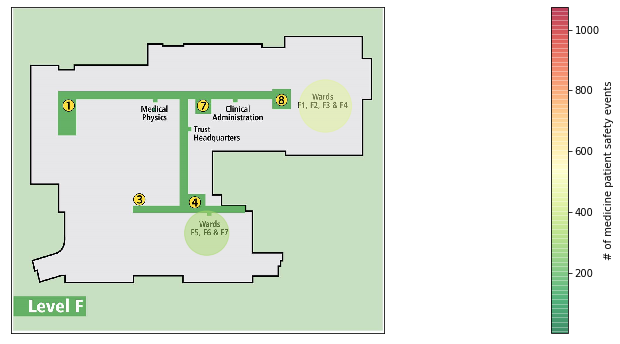

<Figure size 432x288 with 0 Axes>

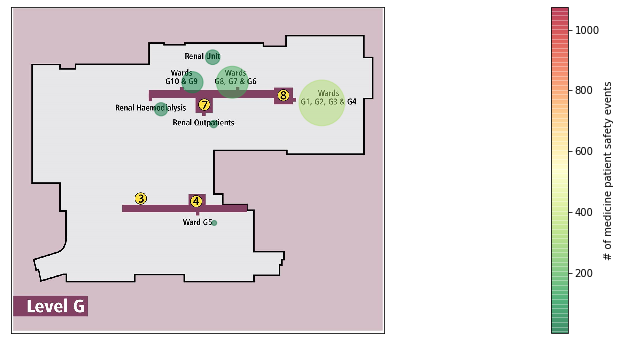

In [28]:
for floor in floors:
    plt.figure()
    img=mpimg.imread('level_maps_'+floor.lower()+'.png')
    plt.figure(figsize=(60,6))
    imgplot = plt.imshow(img)
    fig = plt.gca()
    x = merged_dict[floor].left.values + merged_dict[floor].width.values/2
    y = merged_dict[floor].top.values + merged_dict[floor].height.values/2
    print(merged_dict[floor].events.values)
    size = merged_dict[floor].events.values*area_multiplication
    print(size)
    color = merged_dict[floor].events.values
    print(color)
    plt.scatter(x,y,s=size,c=color,vmin=vmin,vmax=vmax,cmap=cm,alpha=0.5)
    plt.colorbar(label='# of medicine patient safety events')
    fig.get_xaxis().set_visible(False)
    fig.get_yaxis().set_visible(False)